In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [213]:
nypd_arrest = pd.read_csv("dataset/NYPD_Arrest_Data__Year_to_Date_cleaned.csv")

<BarContainer object of 5 artists>

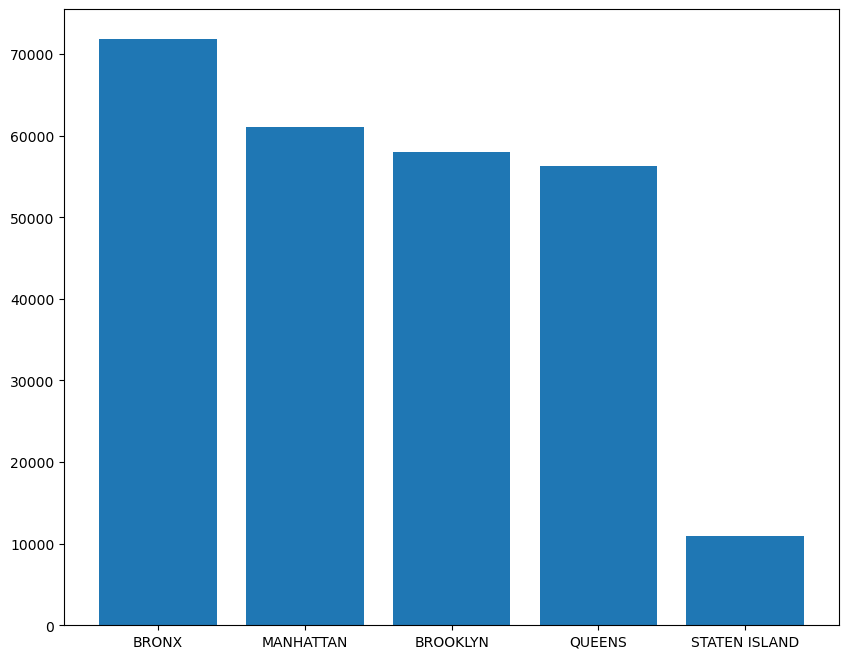

In [214]:
# bar graph for arrest count vs arrest borough

arrest_count = nypd_arrest["Arrest_Borough"].value_counts()

plt.figure(figsize=(10,8))
plt.bar(arrest_count.index, arrest_count.values)

Offense_Category_Code
M    146174
F    108818
V      2212
9       731
I       224
Name: count, dtype: int64


<BarContainer object of 5 artists>

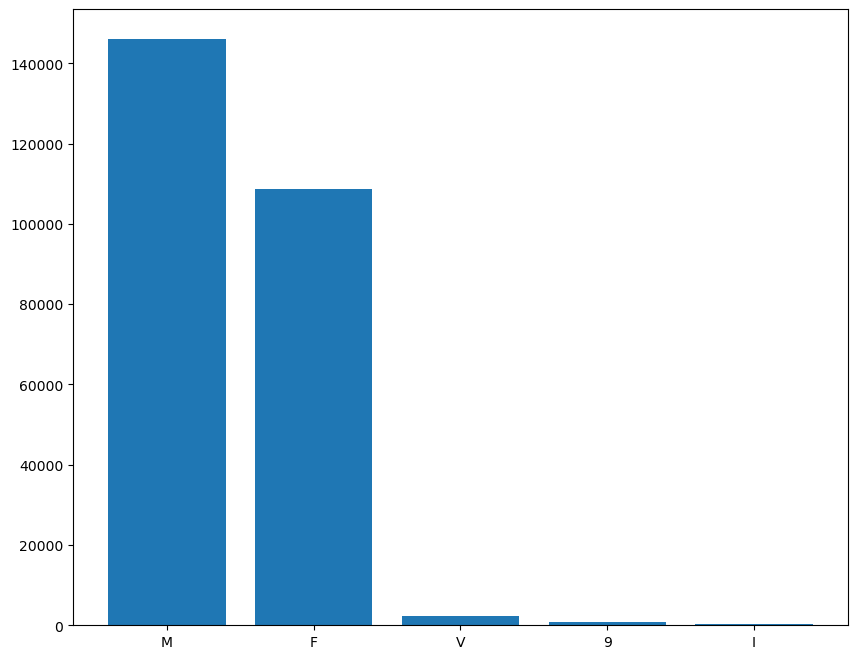

In [215]:
# bar graph for arrest count vs offense category code

offense_count = nypd_arrest["Offense_Category_Code"].value_counts()
print(offense_count)
plt.figure(figsize=(10, 8))
plt.bar(offense_count.index, offense_count.values)

<BarContainer object of 12 artists>

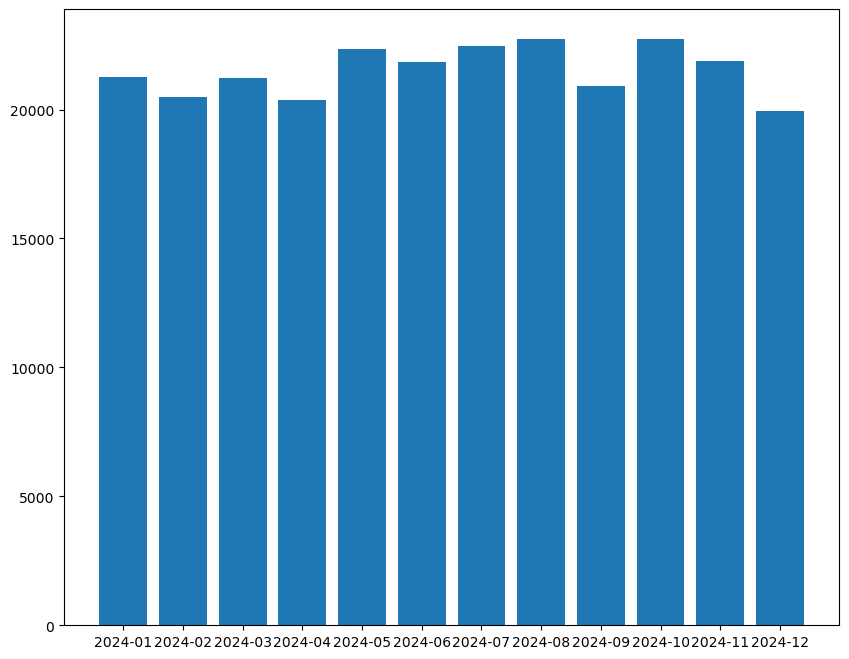

In [216]:
# bar graph for arrest count vs each month of year

nypd_arrest['Arrest_Date'] = pd.to_datetime(nypd_arrest['Arrest_Date'])
arrest_count = nypd_arrest["Arrest_Date"].dt.to_period("M")
arrest_count_sorted = arrest_count.value_counts().sort_index()
plt.figure(figsize=(10, 8))
plt.bar(arrest_count_sorted.index.astype(str), arrest_count_sorted.values)




Arrest_Day_of_Week
Wednesday    44020
Thursday     41841
Tuesday      40753
Friday       37824
Saturday     32711
Monday       32645
Sunday       28365
Name: count, dtype: int64


<BarContainer object of 7 artists>

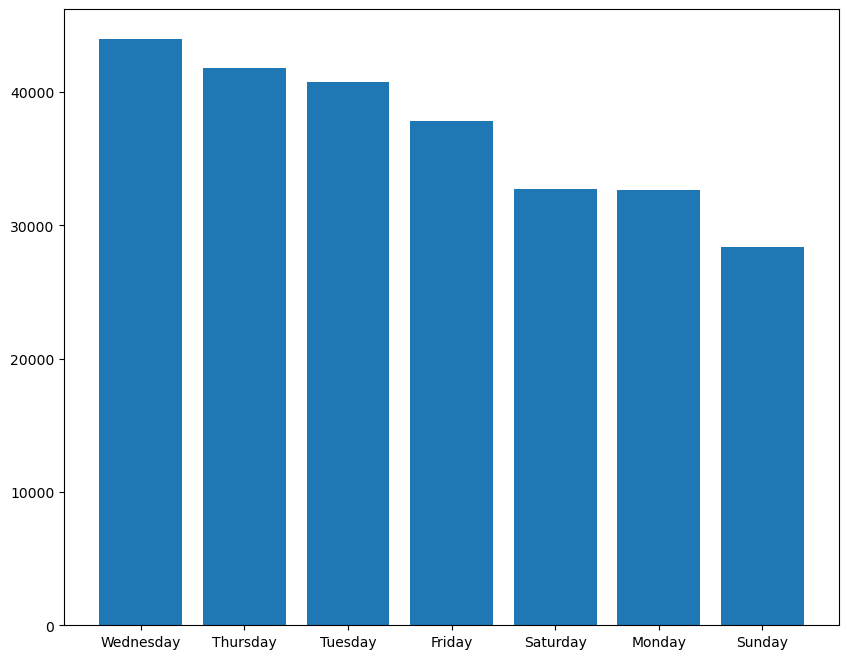

In [217]:
# bar graph for arrest count vs day of week

weekday_count = nypd_arrest["Arrest_Day_of_Week"].value_counts()
print(weekday_count)
plt.figure(figsize=(10, 8))
plt.bar(weekday_count.index, weekday_count.values)

Perpetrator_Sex
M    211546
F     46613
Name: count, dtype: int64


<BarContainer object of 2 artists>

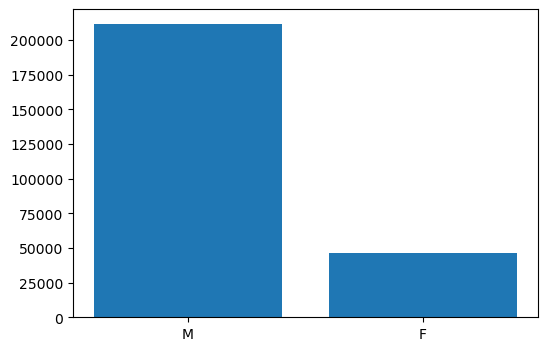

In [218]:
# bar graph for arrest count vs gender

plt.figure(figsize=(6, 4))
gender_distribution = nypd_arrest["Perpetrator_Sex"].value_counts()
print(gender_distribution)
plt.bar(gender_distribution.index, gender_distribution.values)

Perpetrator_Age_Group
25-44    150548
45-64     50727
18-24     42776
<18        9489
65+        4619
Name: count, dtype: int64


<BarContainer object of 5 artists>

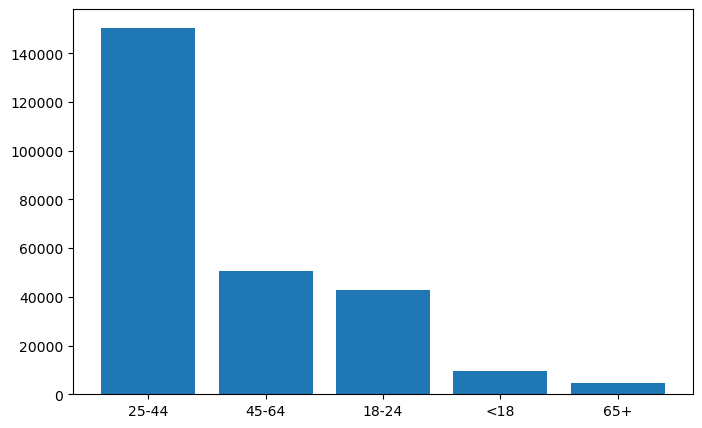

In [219]:
# bar graph for arrest count vs age ranges

plt.figure(figsize=(8, 5))
age_distribution = nypd_arrest["Perpetrator_Age_Group"].value_counts()
print(age_distribution)
plt.bar(age_distribution.index, age_distribution.values)

Perpetrator_Race
BLACK              121512
HISPANIC            95097
WHITE               26017
ASIAN               14716
NATIVE AMERICAN       817
Name: count, dtype: int64


<BarContainer object of 5 artists>

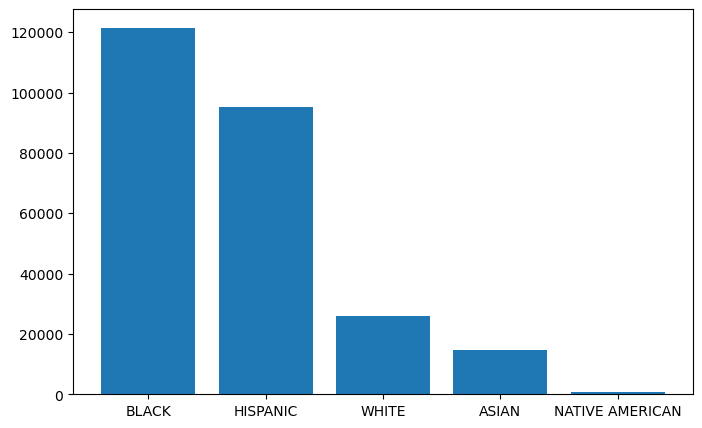

In [220]:
# bar graph for arrest count vs race groups

plt.figure(figsize=(8, 5))
race_distribution = nypd_arrest["Perpetrator_Race"].value_counts()
print(race_distribution)
plt.bar(race_distribution.index, race_distribution.values)

Arrest_Precinct
14     9819
75     8646
40     8338
103    7959
44     7623
46     6558
110    6430
73     5716
120    5493
18     5448
Name: count, dtype: int64


<BarContainer object of 10 artists>

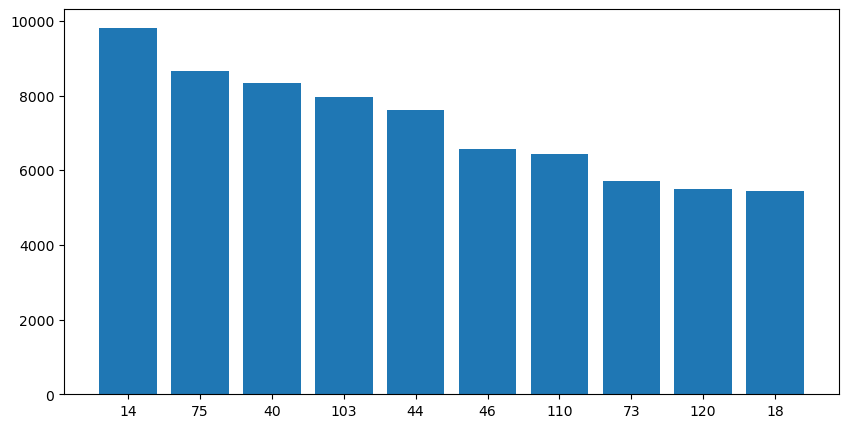

In [221]:
# bar graph for arrest count vs top 10 precincts with the most arrests nlargest function: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

top_precincts = nypd_arrest["Arrest_Precinct"].value_counts().nlargest(10) 
print(top_precincts)
plt.figure(figsize=(10, 5))
# we have to use asType because otherwise pythone reads x value as int (https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html)
plt.bar(top_precincts.index.astype(str), top_precincts.values)


<Axes: title={'center': 'Geospatial Distribution of Arrests in NYC'}, xlabel='Longitude', ylabel='Latitude'>

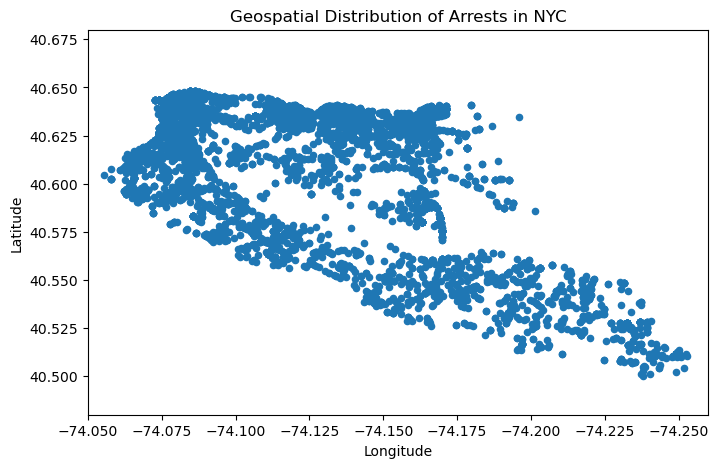

In [222]:
# scatter plot graph for location of arrests (latitude and longitude

nypd_arrest.plot.scatter(x="Longitude",y="Latitude",figsize=(8, 5),title="Geospatial Distribution of Arrests in NYC", xlim=(-74.05, -74.26), ylim=(40.48, 40.68))

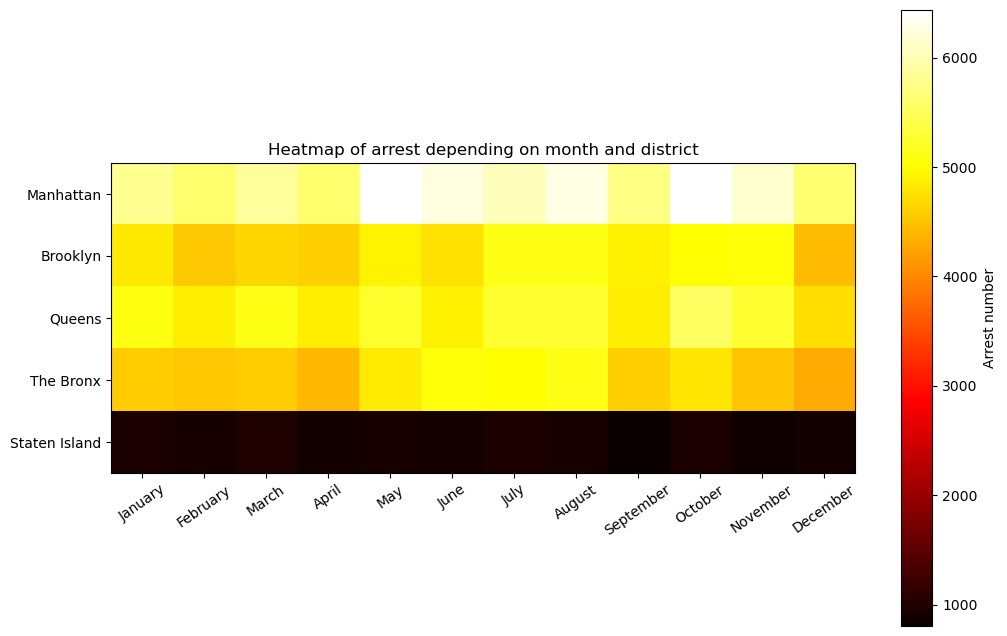

In [223]:
#transform arrest date column to datetime and get the month and year (we did it before but now we have to extract month and year) 
nypd_arrest['Arrest_Date'] = pd.to_datetime(nypd_arrest['Arrest_Date'])
nypd_arrest['Month'] = nypd_arrest['Arrest_Date'].dt.month
nypd_arrest['Year'] = nypd_arrest['Arrest_Date'].dt.year

#pivot table -> we need it (2d data are requested)
pivot_table = pd.pivot_table(
    nypd_arrest,
    values='Arrest_Date',
    index='Arrest_Borough',
    columns='Month',
    aggfunc='count',
    fill_value=0
) 

#heatmap creation
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(pivot_table.values, cmap='hot', interpolation='nearest')

#put on x and y axis respectively the names of months (we have to add them manually) and district
months = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August','September', 'October', 'November', 'December']  
borough = ["Manhattan", "Brooklyn", "Queens", "The Bronx", "Staten Island"]
plt.xticks(
    ticks=range(len(months)),      
    labels=months,           
    rotation=35,                                         
)
plt.yticks(
    ticks=range(len(borough)),   
    labels=borough,              
)

plt.colorbar(heatmap, label='Arrest number')
plt.title('Heatmap of arrest depending on month and district')
plt.show()

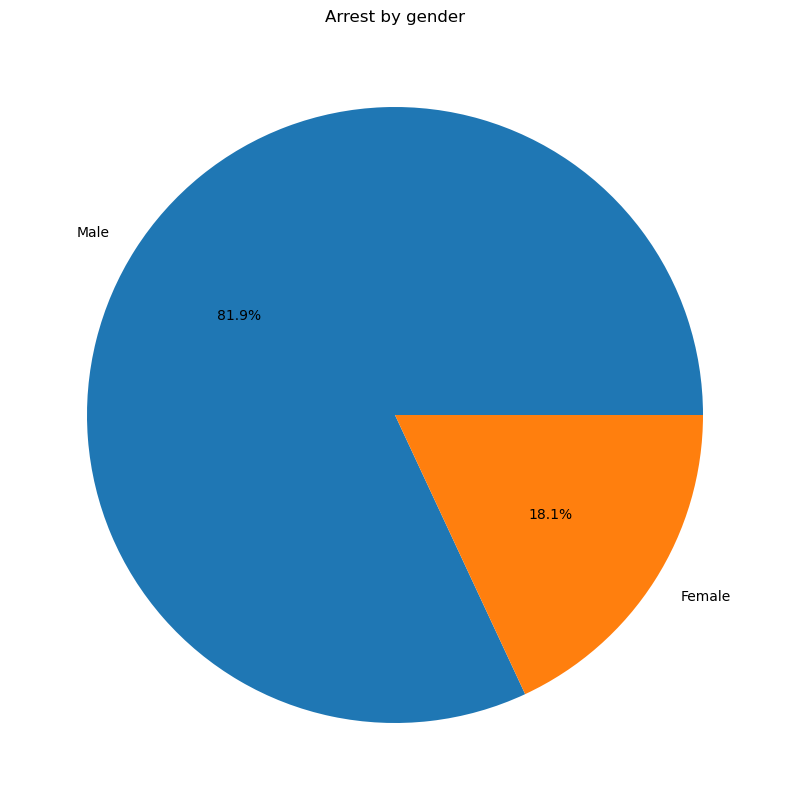

In [224]:
#count number of arrest by gender
gender_arrests_counts = nypd_arrest['Perpetrator_Sex'].value_counts()

#pier chart 
plt.figure(figsize=(10, 10))  
plt.pie(gender_arrests_counts, labels=['Male', 'Female'], autopct='%1.1f%%')

plt.title('Arrest by gender')
plt.show()

In [225]:
assert str(nypd_arrest["Arrest_Date"].dtype) == "datetime64[ns]"  # Verify converted type

In [226]:
nypd_arrest.dtypes

Unnamed: 0                               int64
Arrest_Date                     datetime64[ns]
Police_Department_Code                 float64
Offense_Description                     object
Offense_Key_Code                       float64
Offense_Detailed_Description            object
Law_Code                                object
Offense_Category_Code                   object
Arrest_Borough                          object
Arrest_Precinct                          int64
Jurisdiction_Code                        int64
Perpetrator_Age_Group                   object
Perpetrator_Sex                         object
Perpetrator_Race                        object
Latitude                               float64
Longitude                              float64
Location                                object
Arrest_Day_of_Week                      object
Month                                    int32
Year                                     int32
dtype: object

In [227]:
nypd_arrest.columns

Index(['Unnamed: 0', 'Arrest_Date', 'Police_Department_Code',
       'Offense_Description', 'Offense_Key_Code',
       'Offense_Detailed_Description', 'Law_Code', 'Offense_Category_Code',
       'Arrest_Borough', 'Arrest_Precinct', 'Jurisdiction_Code',
       'Perpetrator_Age_Group', 'Perpetrator_Sex', 'Perpetrator_Race',
       'Latitude', 'Longitude', 'Location', 'Arrest_Day_of_Week', 'Month',
       'Year'],
      dtype='object')

In [228]:
nypd_arrest.columns

Index(['Unnamed: 0', 'Arrest_Date', 'Police_Department_Code',
       'Offense_Description', 'Offense_Key_Code',
       'Offense_Detailed_Description', 'Law_Code', 'Offense_Category_Code',
       'Arrest_Borough', 'Arrest_Precinct', 'Jurisdiction_Code',
       'Perpetrator_Age_Group', 'Perpetrator_Sex', 'Perpetrator_Race',
       'Latitude', 'Longitude', 'Location', 'Arrest_Day_of_Week', 'Month',
       'Year'],
      dtype='object')

In [229]:
nypd_arrest[(nypd_arrest["Perpetrator_Sex"] == "Male") & (nypd_arrest["Arrest_Date"].dt.month == 1)].count()

Unnamed: 0                      0
Arrest_Date                     0
Police_Department_Code          0
Offense_Description             0
Offense_Key_Code                0
Offense_Detailed_Description    0
Law_Code                        0
Offense_Category_Code           0
Arrest_Borough                  0
Arrest_Precinct                 0
Jurisdiction_Code               0
Perpetrator_Age_Group           0
Perpetrator_Sex                 0
Perpetrator_Race                0
Latitude                        0
Longitude                       0
Location                        0
Arrest_Day_of_Week              0
Month                           0
Year                            0
dtype: int64

In [230]:
nypd_arrest[(nypd_arrest["Perpetrator_Sex"] == "Female") & (nypd_arrest["Arrest_Date"].dt.month == 1)].count()

Unnamed: 0                      0
Arrest_Date                     0
Police_Department_Code          0
Offense_Description             0
Offense_Key_Code                0
Offense_Detailed_Description    0
Law_Code                        0
Offense_Category_Code           0
Arrest_Borough                  0
Arrest_Precinct                 0
Jurisdiction_Code               0
Perpetrator_Age_Group           0
Perpetrator_Sex                 0
Perpetrator_Race                0
Latitude                        0
Longitude                       0
Location                        0
Arrest_Day_of_Week              0
Month                           0
Year                            0
dtype: int64